              aromas    aromal   aromasr    WMCSFs      GSRs
Unspecific  0.167712  0.153605  0.155172  0.246082  0.136364
Specific    0.371473  0.322884  0.362069  0.374608  0.407524
Spurious    0.101881  0.067398  0.119122  0.098746  0.117555
No          0.358934  0.456113  0.363636  0.280564  0.338558
     index  Specific  Spurious  Unspecific        No
0   aromas  0.371473  0.101881    0.167712  0.358934
1   aromal  0.322884  0.067398    0.153605  0.456113
2  aromasr  0.362069  0.119122    0.155172  0.363636
3   WMCSFs  0.374608  0.098746    0.246082  0.280564
4     GSRs  0.407524  0.117555    0.136364  0.338558


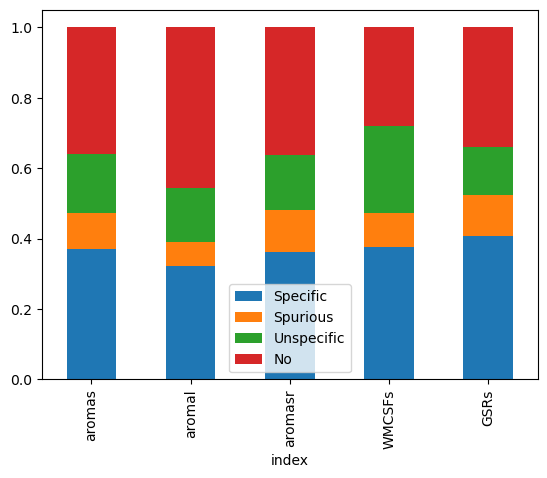

In [58]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from nilearn import plotting
from scipy.stats import chi2_contingency
from math import sqrt

init_folder='/home/traaffneu/margal/code/multirat_se/scripts/'
#analysis_folder='/project/4180000.19/multiRat'
df_path='/home/traaffneu/margal/code/multirat_se/asset/table/multiRat_rest_20220414.tsv'

df = pd.read_csv(df_path, sep='\t')
df = df.loc[(df['rat.ses'] == 1)]
df_exclude = df.loc[(df['exclude'] != 'yes')]

specificity_denoise = pd.concat([df_exclude['aromas_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromal_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromasr_S1bf_cat'].value_counts(sort=False),
                                df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False),
                                df_exclude['GSRs_S1bf_cat'].value_counts(sort=False)], axis=1)

specificity_denoise = specificity_denoise/specificity_denoise.sum()
specificity_denoise = specificity_denoise.rename(columns={"aromas_S1bf_cat": "aromas", "aromal_S1bf_cat": "aromal", "aromasr_S1bf_cat": "aromasr", "WMCSFs_S1bf_cat": "WMCSFs", "GSRs_S1bf_cat": "GSRs"})

print(specificity_denoise)

specificity_denoise_T = specificity_denoise.T
specificity_denoise_T.reset_index(level=0, inplace=True) 
specificity_denoise_T = specificity_denoise_T[["index","Specific", "Spurious", "Unspecific","No"]]
print(specificity_denoise_T)
specificity_denoise_T.set_index('index').plot(kind='bar', stacked=True)

plt.show()  


                  Sex  Stimulation
Male         0.457143     0.000000
Female       0.542857     0.000000
electric     0.000000     0.819048
optogenetic  0.000000     0.095238
thermal      0.000000     0.085714
         index      Male    Female  electric  optogenetic   thermal
0          Sex  0.457143  0.542857  0.000000     0.000000  0.000000
1  Stimulation  0.000000  0.000000  0.819048     0.095238  0.085714


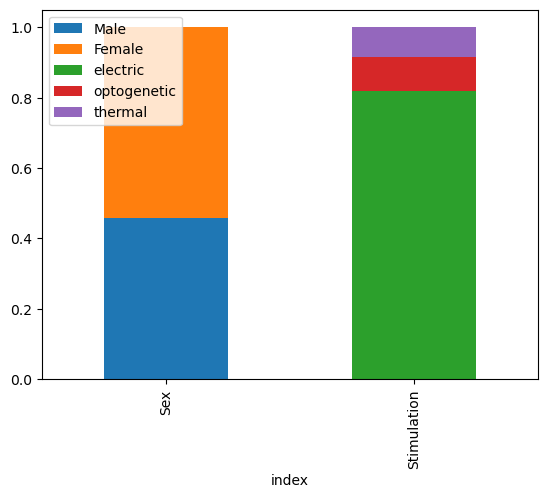

In [78]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from nilearn import plotting
from scipy.stats import chi2_contingency
from math import sqrt

init_folder='/home/traaffneu/margal/code/multirat_se/scripts/'
#analysis_folder='/project/4180000.19/multiRat'
df_path='/home/traaffneu/margal/code/multirat_se/asset/table/metadata.tsv'

df = pd.read_csv(df_path, sep='\t')

specificity_denoise = pd.concat([df['rat.sex'].value_counts(sort=False),
                                df['func.sensory.stimulation'].value_counts(sort=False)], axis=1)

specificity_denoise = specificity_denoise/specificity_denoise.sum()
specificity_denoise = specificity_denoise.rename(columns={"rat.sex": "Sex", "func.sensory.stimulation": "Stimulation"})

specificity_denoise = specificity_denoise.fillna(0)

print(specificity_denoise)

specificity_denoise_T = specificity_denoise.T
specificity_denoise_T.reset_index(level=0, inplace=True) 
print(specificity_denoise_T)
specificity_denoise_T.set_index('index').plot(kind='bar', stacked=True)

plt.show()  
